<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/01_Parameter_estimation_by_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Parameter estimation by optimization
</h1> 
</strong>

---

When doing **statistical inference**, we speak the language of probability. A probability distribution that describes our data has parameters. So, a major goal of **statistical inference** is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it.


###__Clone the repository__ 

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 1979 (delta 54), reused 72 (delta 20), pack-reused 1857
Receiving objects: 100% (1979/1979), 204.68 MiB | 33.58 MiB/s, done.
Resolving deltas: 100% (706/706), done.
Checking out files: 100% (839/839), done.


### __Change the current working directory__

In [2]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/23_Statistical-Thinking-in-Python-[Part -2]/_datasets') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd)

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/23_Statistical-Thinking-in-Python-[Part -2]/_datasets


In [3]:
ls

anscombe.csv                   fortis_beak_depth_heredity.csv
bee_sperm.csv                  frog_tongue.csv
female_literacy_fertility.csv  mlb_nohitters.csv
finch_beaks_1975.csv           scandens_beak_depth_heredity.csv
finch_beaks_2012.csv           sheffield_weather_station.csv


## __Optimal parameters__


> Outcomes of measurements follow probability distributions.

> CDF, which was more effective because there is no binning bias.

$\color{red}{\textbf{Q:}}$ __How did we know that the mean and standard deviation calculated from the data were the appropriate values for the Normal parameters?__

- What if the standard deviation differs by 50%?
- The CDFs no longer match.
- Mean varies by just point-01%.
- Finding the optimal parameters is not always as easy as just computing the **mean** and **standard deviation** from the data. 


### How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call $\tau$ , the typical interval time. The value of the parameter $\tau$ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the $\tau$ you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as `np`, `pd`, `plt`, and `sns`, respectively.

__Instructions__

- `Seed` the random number generator with 42.

- Compute the mean time (in units of number of games) between no-hitters.

- Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.

- Plot the theoretical PDF using `plt.hist()`. Remember to use keyword arguments `bins=50`, `normed=True`, and `histtype='step'`. Be sure to label your axes.

- Show your plot.

In [4]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# reading the data into the pandas dataframe
nohitter = pd.read_csv('mlb_nohitters.csv')

In [6]:
nohitter.isna().sum()

date                0
game_number         0
winning_team       66
losing_team        66
winning_pitcher    66
dtype: int64

In [7]:
nohitter.shape

(294, 5)

In [8]:
nohitter.dropna(inplace=True)
print(nohitter.shape)
nohitter.head()

(228, 5)


,date,game_number,winning_team,losing_team,winning_pitcher
66,19120704,33588,DET,SLA,George Mullin
67,19120830,34018,SLA,DET,Earl Hamilton
68,19120906,34081,NY1,PHI,Jeff Tesreau
69,19140531,35960,CHA,CLE,Joe Benz
70,19140909,37065,BSN,PHI,Iron Davis


In [9]:
nohitter.isna().sum()

date               0
game_number        0
winning_team       0
losing_team        0
winning_pitcher    0
dtype: int64

In [10]:
nohitter.describe()

,date,game_number
count,2.280000e+02,228.000000
mean,1.970200e+07,120184.118421
std,3.060214e+05,52703.979733
min,1.912070e+07,33588.000000
25%,1.951065e+07,82793.750000
50%,1.971562e+07,113232.000000
75%,1.994050e+07,159249.750000
max,2.015100e+07,211208.000000


In [11]:
nohitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 66 to 293
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             228 non-null    int64 
 1   game_number      228 non-null    int64 
 2   winning_team     228 non-null    object
 3   losing_team      228 non-null    object
 4   winning_pitcher  228 non-null    object
dtypes: int64(2), object(3)
memory usage: 10.7+ KB


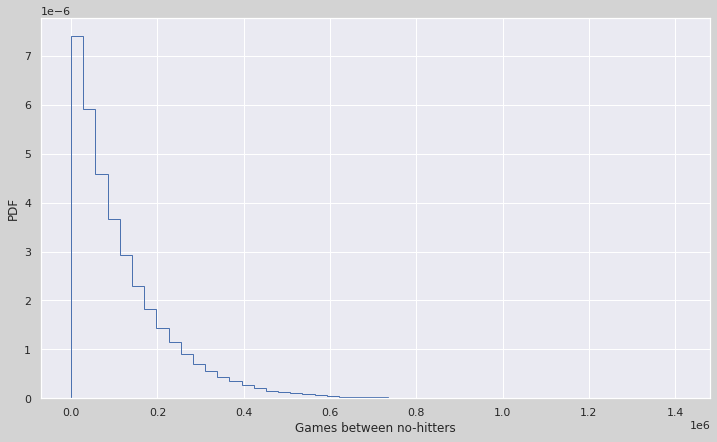

In [12]:
# converting it to numpy array 
nohitter_times = np.array(nohitter.game_number)

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

#plot style
sns.set()

# Plot the PDF and label axes
plt.figure(figsize=(12,7), facecolor='lightgrey')
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the **Exponential distribution**, going from a maximum at 0 and decaying to the right.

### Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the function you created in the previous course to compute the ECDF, as well as the code you wrote to plot it.

__Instructions__

- Compute an ECDF from the actual time between` no-hitters` (`nohitter_times`). Use the `ecdf()` function you wrote in the prequel course.

- Create a CDF from the theoretical samples you took in the last exercise (`inter_nohitter_time`).

Plot `x_theor` and `y_theor` as a line using `plt.plot()`. Then overlay the ECDF of the real data `x` and `y` as points. To do this, you have to specify the keyword arguments `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` inside `plt.plot()`.

Set a `2% margin` on the plot.

Show the plot.

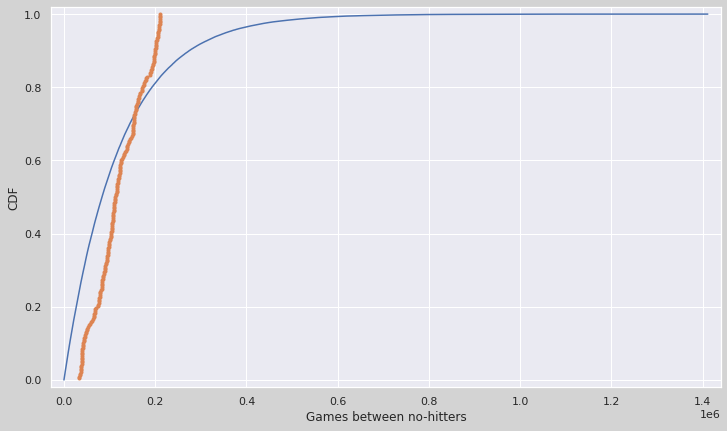

In [13]:
# converting it to numpy array 
nohitter_times = np.array(nohitter.game_number)

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

#plot style
sns.set()
# Plot the PDF and label axes
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

### How is this parameter optimal?

Now sample out of an exponential distribution with $\tau$ being twice as large as the optimal $\tau$. Do it again for $\tau$ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, $\tau$ the  you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

***Note:*** In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

__Instructions__

- Take `10000` samples out of an Exponential distribution with parameter $\tau_{1/2}$ = $\tau$/2.

- Take `10000` samples out of an Exponential distribution with parameter $\tau_2$ = 2*$\tau$.

- Generate CDFs from these two sets of samples using your `ecdf()` function.

- Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

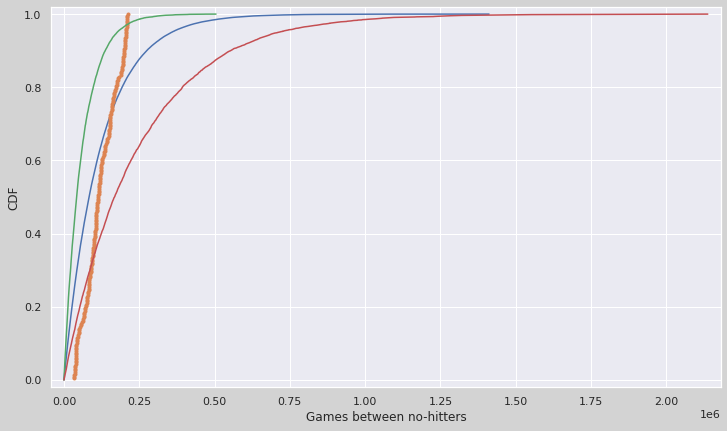

In [14]:
# converting it to numpy array 
nohitter_times = np.array(nohitter.game_number)

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

#plot style
sns.set()

# Plot the PDF and label axes
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Great work! Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.


## __Linear regression by least squares__

__Residuals:__ Vertical distance between the data point and the line is called Residuals.

<p align='center'>
    <a href='#'><img src='https://datacadamia.com/_media/data_mining/statistics_residual.jpg?w=500&tok=75fb38'></a>
</p>

The residual has a negative value because the data point lies below the line. Each data point has a residual associated with it.

__Least squares:__

We define the line that is closest to the data to be the line for which the sum of the squares of all of the residuals is **minimal**. This ***process, finding the parameters for which the sum of the squares of the residuals is minimal***, is called "**least squares**". There are many algorithms to do this in practice.

There are many algorithms to do this in practice.
for Example Numpy function - `np.polyfit()`. which performs ***least squares analysis*** with ***polynomial functions***.

>**Polyfit function** that computes a least squares polynomial for a given set of data. Polyfit generates the coefficients of the polynomial, which can be used to model a curve to fit the data.

We can use it because a ***linear function*** is a ***first degree polynomial***. 

>The **first** two arguments to this function are the `x` and `y` data. 

>The **third** argument is the **degree of the polynomial** ***we wish to fit***; for linear functions. 

The function returns the **slope** and **intercept** of the best **fit line**.


### EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

In [15]:
# loading female_literacy_fertility.csv into the pandas dataframe
df_fertility = pd.read_csv('female_literacy_fertility.csv')
df_fertility.head()


,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [16]:
print(df_fertility.columns)
print(df_fertility.shape)

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')
(162, 5)


In [17]:
df_fertility.describe()

,female literacy,fertility
count,162.000000,162.000000
mean,80.107407,2.878673
std,23.052415,1.427597
min,12.600000,0.966000
25%,66.425000,1.823250
50%,90.000000,2.367500
75%,98.500000,3.880250
max,100.000000,7.069000


In [18]:
df_fertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          162 non-null    object 
 1   Continent        162 non-null    object 
 2   female literacy  162 non-null    float64
 3   fertility        162 non-null    float64
 4   population       162 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.5+ KB


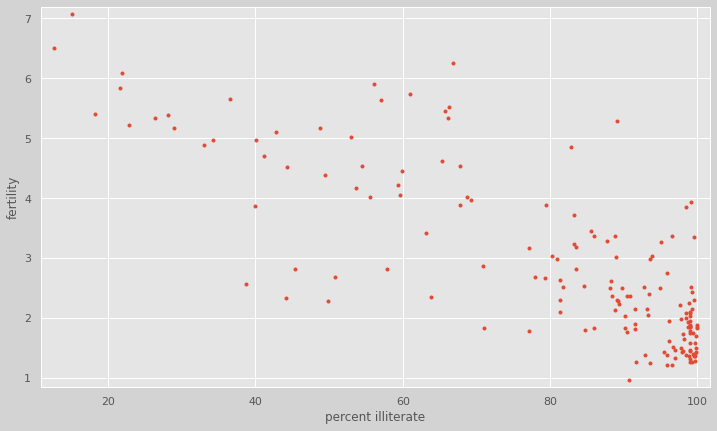

Pearsons correlation: -0.804


In [19]:
from scipy.stats import pearsonr

illiteracy = df_fertility['female literacy']
fertility  = df_fertility['fertility']

# plot style
#sns.set()
plt.style.use('ggplot')

# Plot the PDF and label axes
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Plot the illiteracy rate versus fertility
_ = plt.plot(np.array(illiteracy), np.array(fertility), marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
corr, _ = pearsonr(illiteracy, fertility)
print('Pearsons correlation: %.3f' % corr)

```
	
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
```
You can see the **correlation** between **illiteracy** and **fertility** by eye, and by the substantial **Pearson correlation coefficient** of **0.8**. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman

In [20]:
# pearson Funtion
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays
    
    Args:
        x: arrays
        y: arrays
        
    returns:
        r: int
    """
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry[0, 1]
    return corr_mat[0, 1]

illiteracy = df_fertility['female literacy']
fertility  = df_fertility['fertility']

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

-0.8041324026815341


### Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, $y=mx+c$ , where `m` is the slope and `c` is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

slope = -0.049798548090634234 children per woman / percent illiterate
intercept = 6.867905419699977 children per woman


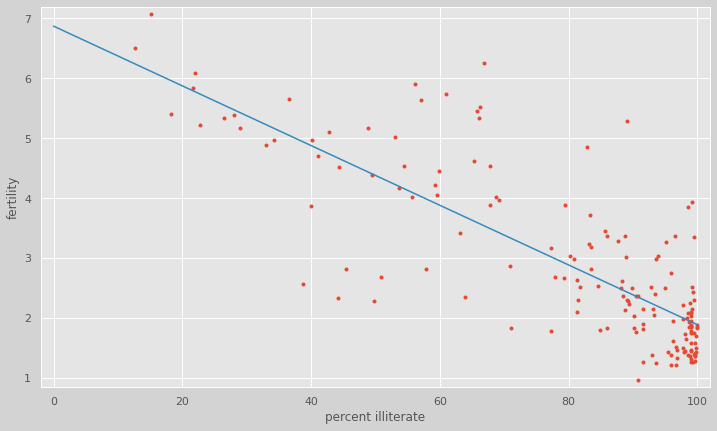

In [21]:
illiteracy = df_fertility['female literacy']
fertility  = df_fertility['fertility']

# plot style
#sns.set()
plt.style.use('ggplot')

# Plot Size
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Plot the illiteracy rate versus fertility
_ = plt.plot(np.array(illiteracy), np.array(fertility), marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

In [22]:
df_fertility.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


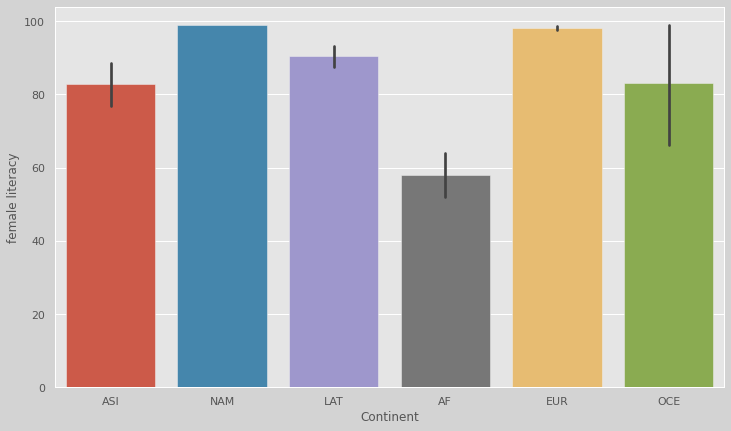

In [23]:
# Plot Size
plt.figure(figsize=(12,7), facecolor='lightgrey')

sns.barplot(x='Continent', y='female literacy', data=df_fertility)

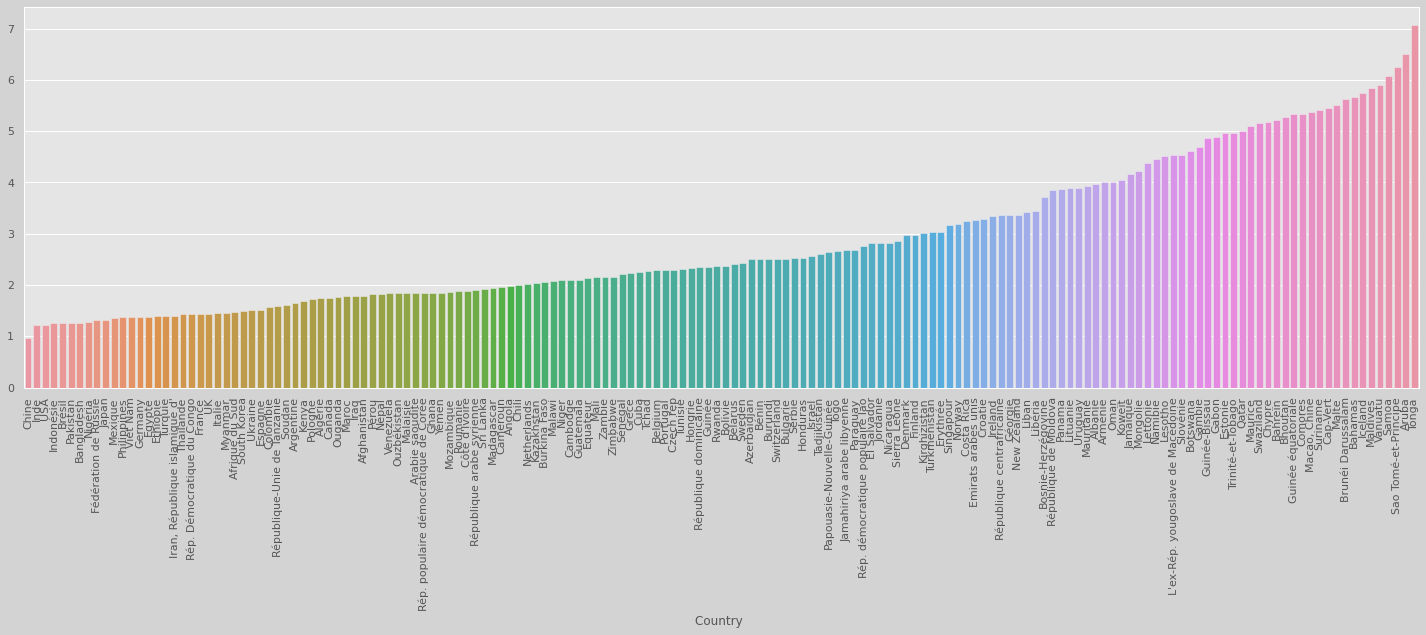

In [24]:
# Plot Size
plt.figure(figsize=(25,7), facecolor='lightgrey')

sns.barplot(x='Country ', y=sorted(df_fertility.fertility), data=df_fertility)
plt.xticks(rotation = 90)
plt.show()

In [25]:
print(df_fertility.fertility.max())
df_fertility.loc[df_fertility['fertility'] == 7.069]

7.069


,Country,Continent,female literacy,fertility,population
62,Niger,AF,15.1,7.069,"14,704,318"


### How is it optimal?

The function `np.polyfit()` that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

__Instructions__

- Specify the values of the slope to compute the RSS. Use `np.linspace()` to get 200 points in the range between 0 and `0.1`. For example, to get 100 points in the range between `0` and `0.5`, you could use `np.linspace()` like so: `np.linspace(0, 0.5, 100)`.

- Initialize an array, `rss`, to contain the RSS using `np.empty_like()` and the array you created above. The `empty_like()` function returns a new array with the same shape and type as a given array (in this case, `a_vals`).

- Write a `for` loop to compute the sum of RSS of the slope. Hint: the RSS is given by `np.sum((y_data - a * x_data - b)**2)`. 

- The variable `b` you computed in the last exercise is already in your namespace. Here, `fertility` is the `y_data` and illiteracy the `x_data`.

- Plot the RSS (`rss`) versus slope (`a_vals`).

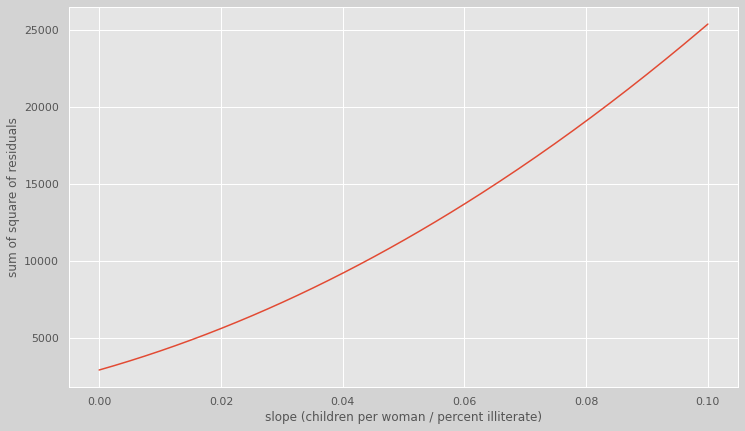

In [26]:
illiteracy = df_fertility['female literacy']
fertility  = df_fertility['fertility']

# plot style
#sns.set()
plt.style.use('ggplot')

# Plot the PDF and label axes
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression

## __The importance of EDA: Anscombe's quartet__




***Anscombe's quartet*** comprises four data sets that have nearly **identical simple descriptive statistics**, yet have very **different distributions** and **appear very different when graphed**. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to ***demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties***. 

<p align='center'>
  <a href="#">
    <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png'>
    </a>
</p>

>__All four sets are identical when examined using simple summary statistics, but vary considerably when graphed__


- we can be protected from misinterpretation of the type demonstrated by Anscombe's quartet.


- EDA provides a good starting point for planning the rest of your analysis.


- EDA is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.


<strong> 
    <h1 align='center'>Look before you leap!</h1> 
</strong>







### Linear regression on appropriate Anscombe data



In [27]:
ansc_raw = pd.read_csv('anscombe.csv')
ansc_raw.head()

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84


In [28]:
anscombe = pd.read_csv('anscombe.csv')
anscombe = anscombe[1:].astype(float)
anscombe.columns = ['x1','y1','x2','y2','x3','y3','x4','y4']
anscombe.head()

,x1,y1,x2,y2,x3,y3,x4,y4
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [29]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 1 to 11
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      11 non-null     float64
 1   y1      11 non-null     float64
 2   x2      11 non-null     float64
 3   y2      11 non-null     float64
 4   x3      11 non-null     float64
 5   y3      11 non-null     float64
 6   x4      11 non-null     float64
 7   y4      11 non-null     float64
dtypes: float64(8)
memory usage: 836.0 bytes


In [30]:
anscombe.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


0.5000909090909094 3.000090909090908


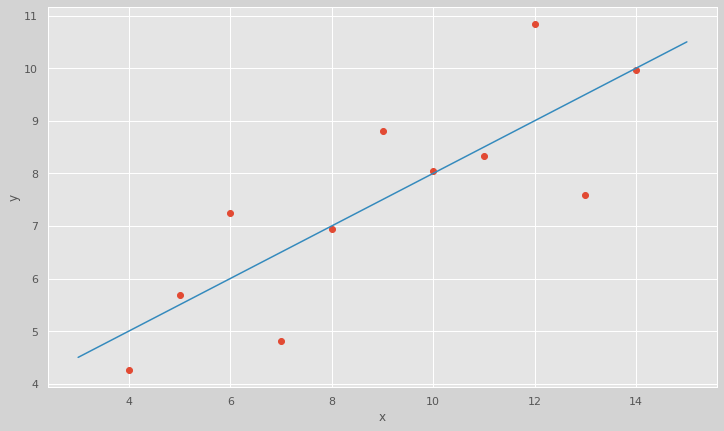

In [31]:
x = np.array(anscombe['x1'])
y = np.array(anscombe['y1'])

# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# plot style
plt.style.use('ggplot')

# Plot the PDF and label axes
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='o', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### Linear regression on all Anscombe data

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; `anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`, where, for example, `x2` and `y2` are the  and  values for the second Anscombe data set.

In [32]:
x1 = np.array(anscombe['x1'])
y1 = np.array(anscombe['y1'])
x2 = np.array(anscombe['x2'])
y2 = np.array(anscombe['y2'])
x3 = np.array(anscombe['x3'])
y3 = np.array(anscombe['y3'])
x4 = np.array(anscombe['x4'])
y4 = np.array(anscombe['y4'])

anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.0009090909090905
slope: 0.49972727272727313 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.0017272727272735


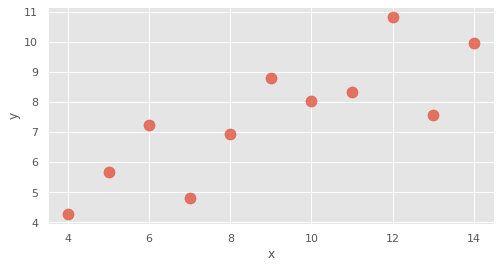

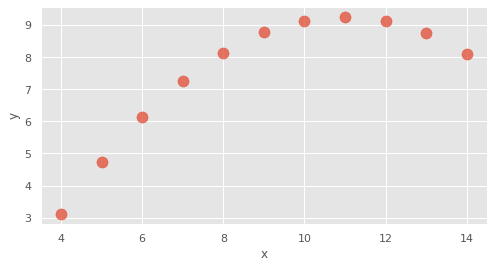

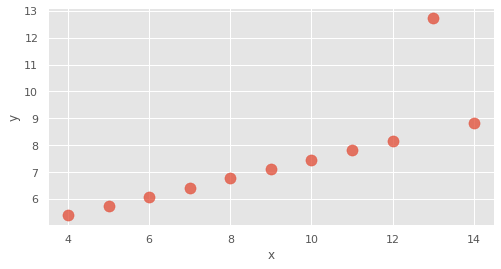

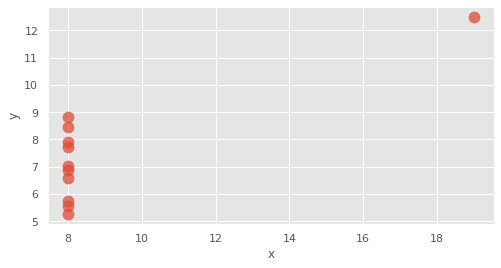

In [33]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    plt.figure(figsize=(8,4))
    _ = plt.scatter(x, y, marker='.', alpha=0.75, s=500)

    # Label the axes
    plt.xlabel('x')
    plt.ylabel('y')

    # Show the plot
    plt.show()

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>